In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from skimage.morphology import skeletonize, opening, square, disk, erosion, closing
from skimage.morphology import dilation
from skimage import data
from skimage.color import rgb2gray
from skimage import io
from skimage.filters import threshold_mean#for binarising

In [2]:
def show_image(image, label ="Image:", size=(6,2)):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=size)
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap='gray') 
    plt.show()

### Understanding dialation & Erosion
- Erode on the original image makes the holes huge, but removes unnecessary small ojects
- Erode on the dilated image, make the back to original size

- Dilation on the image multiple time, removes holes


#### For iamgeJ (erosion & dilation):

###### Stucturing element: By default  8 neighbor

    -import image
    -edit-invert
    -for removing holes: process-binary-dilate X 2 
    -for going back to original size: process-binary-erode X 2   

In [3]:
filename = 'rhino_detail.tif'

print("Removing holes with dialation of white parts/foreground")
rhino = io.imread(filename)

Removing holes with dialation of white parts/foreground


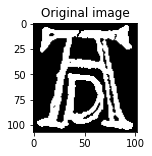

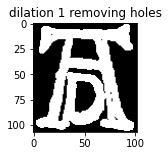

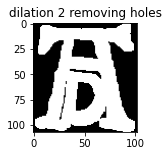

In [4]:
show_image(rhino, "Original image")


rhinodil1 = dilation(rhino,square(3))
show_image(rhinodil1, "dilation 1 removing holes")

rhinodil2 = dilation(rhinodil1,square(3))
show_image(rhinodil2, "dilation 2 removing holes")

After removing holes, going back to original size with erosion


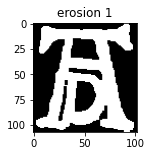

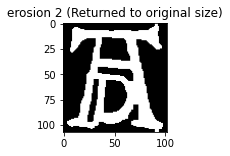

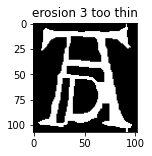

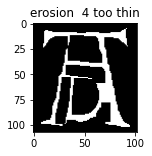

In [5]:
print("After removing holes, going back to original size with erosion")
rhinoerode = erosion(rhinodil2,square(3)) # With the already dilated image
# show_image(rhino, "Original image")
# rhinoerode = erosion(rhino,square(3)) # With the original image
show_image(rhinoerode, "erosion 1")

rhinoerode1 = erosion(rhinoerode,square(3))
show_image(rhinoerode1, "erosion 2 (Returned to original size)")

#2 time was enough for going back to original size, 4 makes it too thin/small
rhinoerode2 = erosion(rhinoerode1,square(3))
show_image(rhinoerode2, "erosion 3 too thin")


rhinoerode3  = erosion(rhinoerode2,square(3))
show_image(rhinoerode3, "erosion  4 too thin")

## Understanding Contouring with erode  & dilate

#### For iamgeJ (Contoring):

    -import image
    -Getting binary image: Process-binary-make binary (This image will have holes) [Object white]
    - Image1: For removing holes: Dilate/grow the binary image, multiple time: process-binary-grow X 2 [Object white]   
    - Image2: Make a copy of the dilated image (holes filled-white): image-duplicate [Object white]
    - Image2: Erode the dilated image (holes filled-white)-Minimum 3 times- [more you erode contour will be thicker]
    - Image1: Then invert the Dialated image: edit-invert [Object Black]
    -for Contour: process-image calculator: Image1[black object] OR image2[white object]
    -result will be the contour   

In [6]:
def get_binary_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the gray image as numpy array """
    
    #Getting the image  
    #filename = '../Images/'+name
    filename = name
    image = io.imread(filename, as_gray = True) 
    
    #binarising
    thresh = threshold_mean(image)
    binary = image > thresh

    return binary

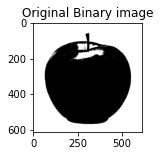

In [7]:
image = get_binary_image("Apple.jpg")
show_image(image, "Original Binary image")

In [8]:
def fill_holes(image):
    #Dilating for filling hole of the image
    filled_dialated_image = np.invert(image)
    for i in range(5):
        filled_dialated_image = dilation(filled_dialated_image,square(7))
    #     show_image(eroded_image, "Erosion "+str(i))

    filled_dialated_image = np.invert(filled_dialated_image)
    return filled_dialated_image

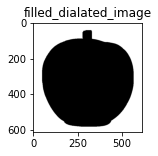

In [9]:
filled_dialated_image = fill_holes(image)
show_image(filled_dialated_image, "filled_dialated_image")

In [10]:
def get_eroded_inverted(image):
    #Eroding the image
    eroded_image = image
    for i in range(3):
        eroded_image = erosion(eroded_image,square(5))
    #     show_image(eroded_image, "Erosion "+str(i))
    
    # Inverting the image
    inverted_eroded_image = np.invert(eroded_image)
    return inverted_eroded_image

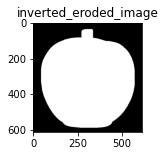

In [11]:
inverted_eroded_image = get_eroded_inverted(filled_dialated_image)
show_image(inverted_eroded_image, "inverted_eroded_image")

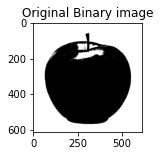

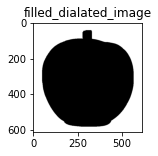

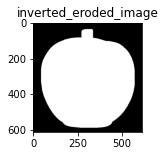

Original Binary image shape (612, 612)
filled_dialated image shape (612, 612)
Inverted eroded image shape (612, 612)


In [12]:
# CHECKING THE SIZES
show_image(image, "Original Binary image")
show_image(filled_dialated_image, "filled_dialated_image")
show_image(inverted_eroded_image, "inverted_eroded_image")

print("Original Binary image shape", image.shape)
print("filled_dialated image shape", filled_dialated_image.shape)
print("Inverted eroded image shape", inverted_eroded_image.shape)

In [13]:
#Getting the contour
contour = filled_dialated_image.astype(int) + inverted_eroded_image.astype(int)
inverted_contour = np.invert(contour)
print("contour image shape", contour.shape)
print("inverted_contour image shape", inverted_contour.shape)

contour image shape (612, 612)
inverted_contour image shape (612, 612)


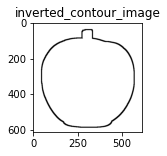

In [14]:
# show_image(contour, "contour_image")
show_image(inverted_contour, "inverted_contour_image")

### Understanding opening & closing

1. Open

- Performs an erosion operation, followed by dilation. 
- This smoothes objects and removes isolated pixels/ **removes noises**.

2. Close
- Performs a dilation operation, followed by erosion. 
- This smoothes objects and **fills in small holes**.

In [15]:
filename = 'RH.tif'
rhino = io.imread(filename)

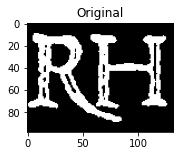

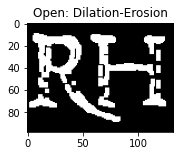

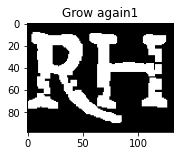

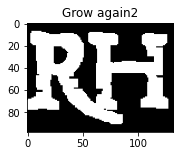

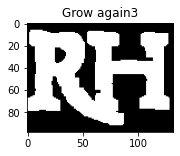

In [19]:
# smothed the image with open  then, Trying to fill the holes with dilation/grow

show_image(rhino, "Original", (3,2))

rhinoopen = opening(rhino,square(4))
show_image(rhinoopen, "Open: Dilation-Erosion", (3,2))

rhinodilate2 = dilation(rhinoopen,square(3))
show_image(rhinodilate2, "Grow again1", (3,2))

rhinodilate3 = dilation(rhinodilate2,square(3))
show_image(rhinodilate3, "Grow again2", (3,2))

rhinodilate4 = dilation(rhinodilate3,square(3))
show_image(rhinodilate4, "Grow again3", (3,2))

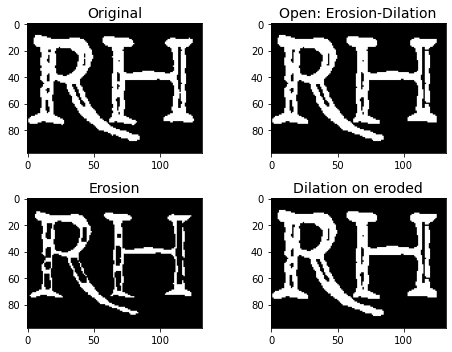

In [18]:
# Understanding Open: Erosion-Dilation

rhinoopen = opening(rhino,square(3))
eroded = erosion(rhino,square(3))
dilation_on_eroded = skimage.morphology.dilation(eroded, square(3))


#Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 5))

ax[0,0].imshow(rhino, cmap='gray')
ax[0,0].set_title("Original", fontsize = 14)

ax[0, 1].imshow(rhinoopen, cmap='gray')
ax[0, 1].set_title(r'Open: Erosion-Dilation', fontsize = 14)

ax[1, 0].imshow(eroded, cmap='gray')
ax[1, 0].set_title(r'Erosion', fontsize = 14)

ax[1, 1].imshow(dilation_on_eroded, cmap='gray')
ax[1, 1].set_title(r'Dilation on eroded', fontsize = 14)


fig.tight_layout()
plt.show()

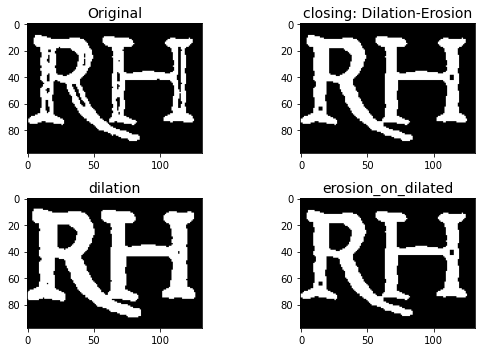

In [20]:
# Understanding closing: Dilation-Erosion

rhinoclose = closing(rhino,square(3))

dilation = skimage.morphology.dilation(rhino, square(3))
erosion_on_dilated = erosion(dilation, square(3))


#Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 5))

ax[0,0].imshow(rhino, cmap='gray')
ax[0,0].set_title("Original", fontsize = 14)

ax[0, 1].imshow(rhinoclose, cmap='gray')
ax[0, 1].set_title(r'closing: Dilation-Erosion', fontsize = 14)

ax[1, 0].imshow(dilation, cmap='gray')
ax[1, 0].set_title(r'dilation', fontsize = 14)

ax[1, 1].imshow(erosion_on_dilated, cmap='gray')
ax[1, 1].set_title(r'erosion_on_dilated', fontsize = 14)


fig.tight_layout()
plt.show()

# Understanding Dilation-Erosion, Opening-Closing

In [ ]:
bright_pixel = np.array([[0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0]], dtype=np.uint8)

show_image(bright_pixel, "bright_pixel")

demodil = dilation(bright_pixel, square(3))
show_image(demodil, "Dilated bright_pixel")

In [ ]:
bright_pixel2 = np.array([[0, 0, 0, 0, 0],
                         [0, 1, 1, 1, 0],
                         [0, 1, 1, 1, 0],
                         [0, 1, 1, 1, 0],
                         [0, 0, 0, 0, 0]], dtype=np.uint8)
show_image(bright_pixel2, "bright_pixel2")

demoerode = erosion(bright_pixel2, square(3))
show_image(demoerode, "eroded bright_pixel")

In [ ]:
bad_connection = np.array([ [1, 0, 0, 0, 1],
                            [1, 1, 0, 1, 1],
                            [1, 1, 1, 1, 1],
                            [1, 1, 0, 1, 1],
                            [1, 0, 0, 0, 1]], dtype=np.uint8)

demoopen = opening(bad_connection,square(3))

## MImicing OPEN--EROSION, DILATE
demoe = erosion(bad_connection,square(3))
demod = dilation(demoe, square(3))

#Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 5))

ax[0,0].imshow(bad_connection, cmap='gray')
ax[0,0].set_title("bad_connection", fontsize = 14)

ax[0, 1].imshow(demoopen, cmap='gray')
ax[0, 1].set_title(r'OPEN:(erosion, dilation)', fontsize = 14)

ax[1, 0].imshow(demoe, cmap='gray')
ax[1, 0].set_title(r'Eroded bad_connection', fontsize = 14)

ax[1, 1].imshow(demod, cmap='gray')
ax[1, 1].set_title(r'Dialated (Eroded bad_connection)', fontsize = 14)

fig.tight_layout()
plt.show()

In [ ]:
broken_line = np.array([[0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0],
                         [1, 1, 0, 1, 1],
                         [0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0]], dtype=np.uint8)

democlose = closing(broken_line,square(3))

## MImicing OPEN--EROSION, DILATE
demod = dilation(broken_line,square(3))
demoe = erosion(demod, square(3))

#Plotting the image
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8, 5))

ax[0,0].imshow(broken_line, cmap='gray')
ax[0,0].set_title("broken_line", fontsize = 14)

ax[0, 1].imshow(democlose, cmap='gray')
ax[0, 1].set_title(r'Closeing(dilate, erosion)', fontsize = 14)

ax[1, 0].imshow(demod, cmap='gray')
ax[1, 0].set_title(r'dilate broken_line', fontsize = 14)

ax[1, 1].imshow(demoe, cmap='gray')
ax[1, 1].set_title(r"erosion dilate broken_line", fontsize = 14)

fig.tight_layout()
plt.show()

# Thinning (Skeletonize)

In [ ]:
#Inverting the image
imageinv = image
shape = np.shape(image)
for i in range(shape[0]):
    for j in range(shape[1]):
        if image[i,j] == 0:
            imageinv[i,j] = 1
        else:
            imageinv[i,j] = 0
            
show_image(imageinv, "Orginal image Inverted", (8,4))

skeleton = skeletonize(imageinv)
show_image(skeleton, "skeleton for white object", (8,4))


In [ ]:
image = data.horse()# object black
skeleton_wrong = skeletonize(image) # skeletonizing the black object, which gives wrong ans in skeleton
imageinv2 = np.invert(image)# inverting the image for making object white
skeleton2 = skeletonize(imageinv2)# skeletonizing the white object, which gives wrong ans in skeleton

##  Plotting the image
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 6))

ax[0].imshow(image, cmap ='gray')
ax[0].set_title('Orginal image, black object', fontsize = 14)

ax[1].imshow(imageinv2, cmap ='gray')
ax[1].set_title(r'Orginal image Inverted', fontsize = 14)

ax[2].imshow(skeleton2, cmap ='gray')
ax[2].set_title(r'skeleton for white object', fontsize = 14)

ax[3].imshow(skeleton_wrong, cmap ='gray')
ax[3].set_title(r'skeleton for Black object[Wrong] ', fontsize = 14)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()